# **Computer Assignment 1**

**Imputting the Dataset**

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv")
df

## **Part 1: Data Quality Report**

In [ ]:
#Looking at the data structure
df.head(10)

In [ ]:
# Generate basic statistics
print(df.describe())


In [ ]:
# Check for missing or null values
print(df.info())
print(df.isna().sum())


In [ ]:
# Check for unique values
for column in df.columns:
    print(f"{column} unique values: {df[column].nunique()}")

**Data Quality Formatting**

In [ ]:
#Continuous Data Quality Report
continuous_vars = df.select_dtypes(include=['float', 'int'])

continuous_summary = continuous_vars.describe().append(continuous_vars.nunique().rename('cardinality')).append((continuous_vars.isna().sum()/len(df)*100).rename('% missing')).T
print(continuous_summary)

In [ ]:
#Categorical Data Quality Report 
categorical_vars = df.select_dtypes(include=['object'])
# Create a data quality report for the categorical features
categorical_summary = pd.DataFrame(categorical_vars.count(), columns=['count'])
categorical_summary['cardinality'] = pd.DataFrame(categorical_vars.nunique())
categorical_summary['% missing'] = categorical_vars.isna().sum()/len(df)*100
categorical_summary['mode'] = categorical_vars.mode().iloc[0]
categorical_summary['mode frequency'] = categorical_vars.apply(lambda x: x.value_counts().iloc[0])
categorical_summary['mode %'] = (categorical_summary['mode frequency'] / len(categorical_vars) *100).round(2)

print(categorical_summary)

**Visualization of our Data:**

In [10]:
import matplotlib.pyplot as plt

In [11]:
numerical_vars = df.select_dtypes(include=['float', 'int'])
categorical_vars = df.select_dtypes(include=['object'])

In [ ]:
#Histogram for numerical section
numerical_cols = df.select_dtypes(include=['float', 'int'])

for column in numerical_cols:
    plt.figure()
    numerical_cols[column].hist()
    plt.title(column)
    plt.show()

In [ ]:
#Histogram for Categorical Section
#using the same for loop for the continuous variables, we can do the same for categorical variables
categorical_cols = df.select_dtypes(include=['object'])

for column in categorical_cols:
    plt.figure()
    categorical_cols[column].value_counts().sort_values().plot(kind='bar')
    plt.title(column)
    plt.show()

### **Part 2: Pre-Processing**

In [ ]:
df.isna().sum()/len(df)*100

In [ ]:
df.info()

1. Handling Missing Values

In [16]:
#Dropping Columns with 60% or more missing values
df=df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1)

In [ ]:
#Columns with NA
NA_columns=[i for i in df.columns if df[i].isnull().any()]
df[NA_columns].info()

In [ ]:
df[NA_columns].isnull().sum()/len(df)

In [ ]:
print(df.isnull().sum())

In [ ]:
df.shape

In [21]:
#Making missing numerical values filled with the mean
numeric = df.select_dtypes(include=np.number)
numeric_columns = numeric.columns

In [ ]:
df[numeric_columns] = df[numeric_columns].fillna(df.mean())

In [ ]:
df.info()

In [27]:
df.dropna(inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
#Remove Outliers
df["SalePrice"].describe()

In [31]:
Q1 = df["SalePrice"].quantile(.25)
Q3 = df["SalePrice"].quantile(.75)
IQR = Q3 - Q1

In [ ]:
print(f"IQR: {IQR}")

In [34]:
LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

In [35]:
print(f"LL: {LL}")
print(f"UL: {UL}")

LL: 7500.0
UL: 347500.0


In [ ]:
df['SalePrice'] = df['SalePrice'].clip(lower=7500, upper=347500)

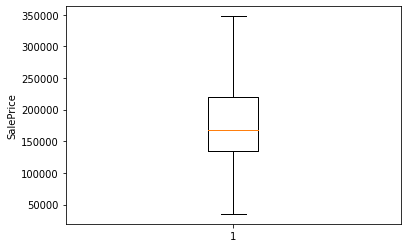

In [44]:
#Boxplot without Outliers
plt.boxplot(df['SalePrice'])
plt.ylabel('SalePrice')
plt.show()

In [45]:
# IDness: Check for duplicate values
print(df.duplicated().sum())


0


## **Part 3: Post-Processing**

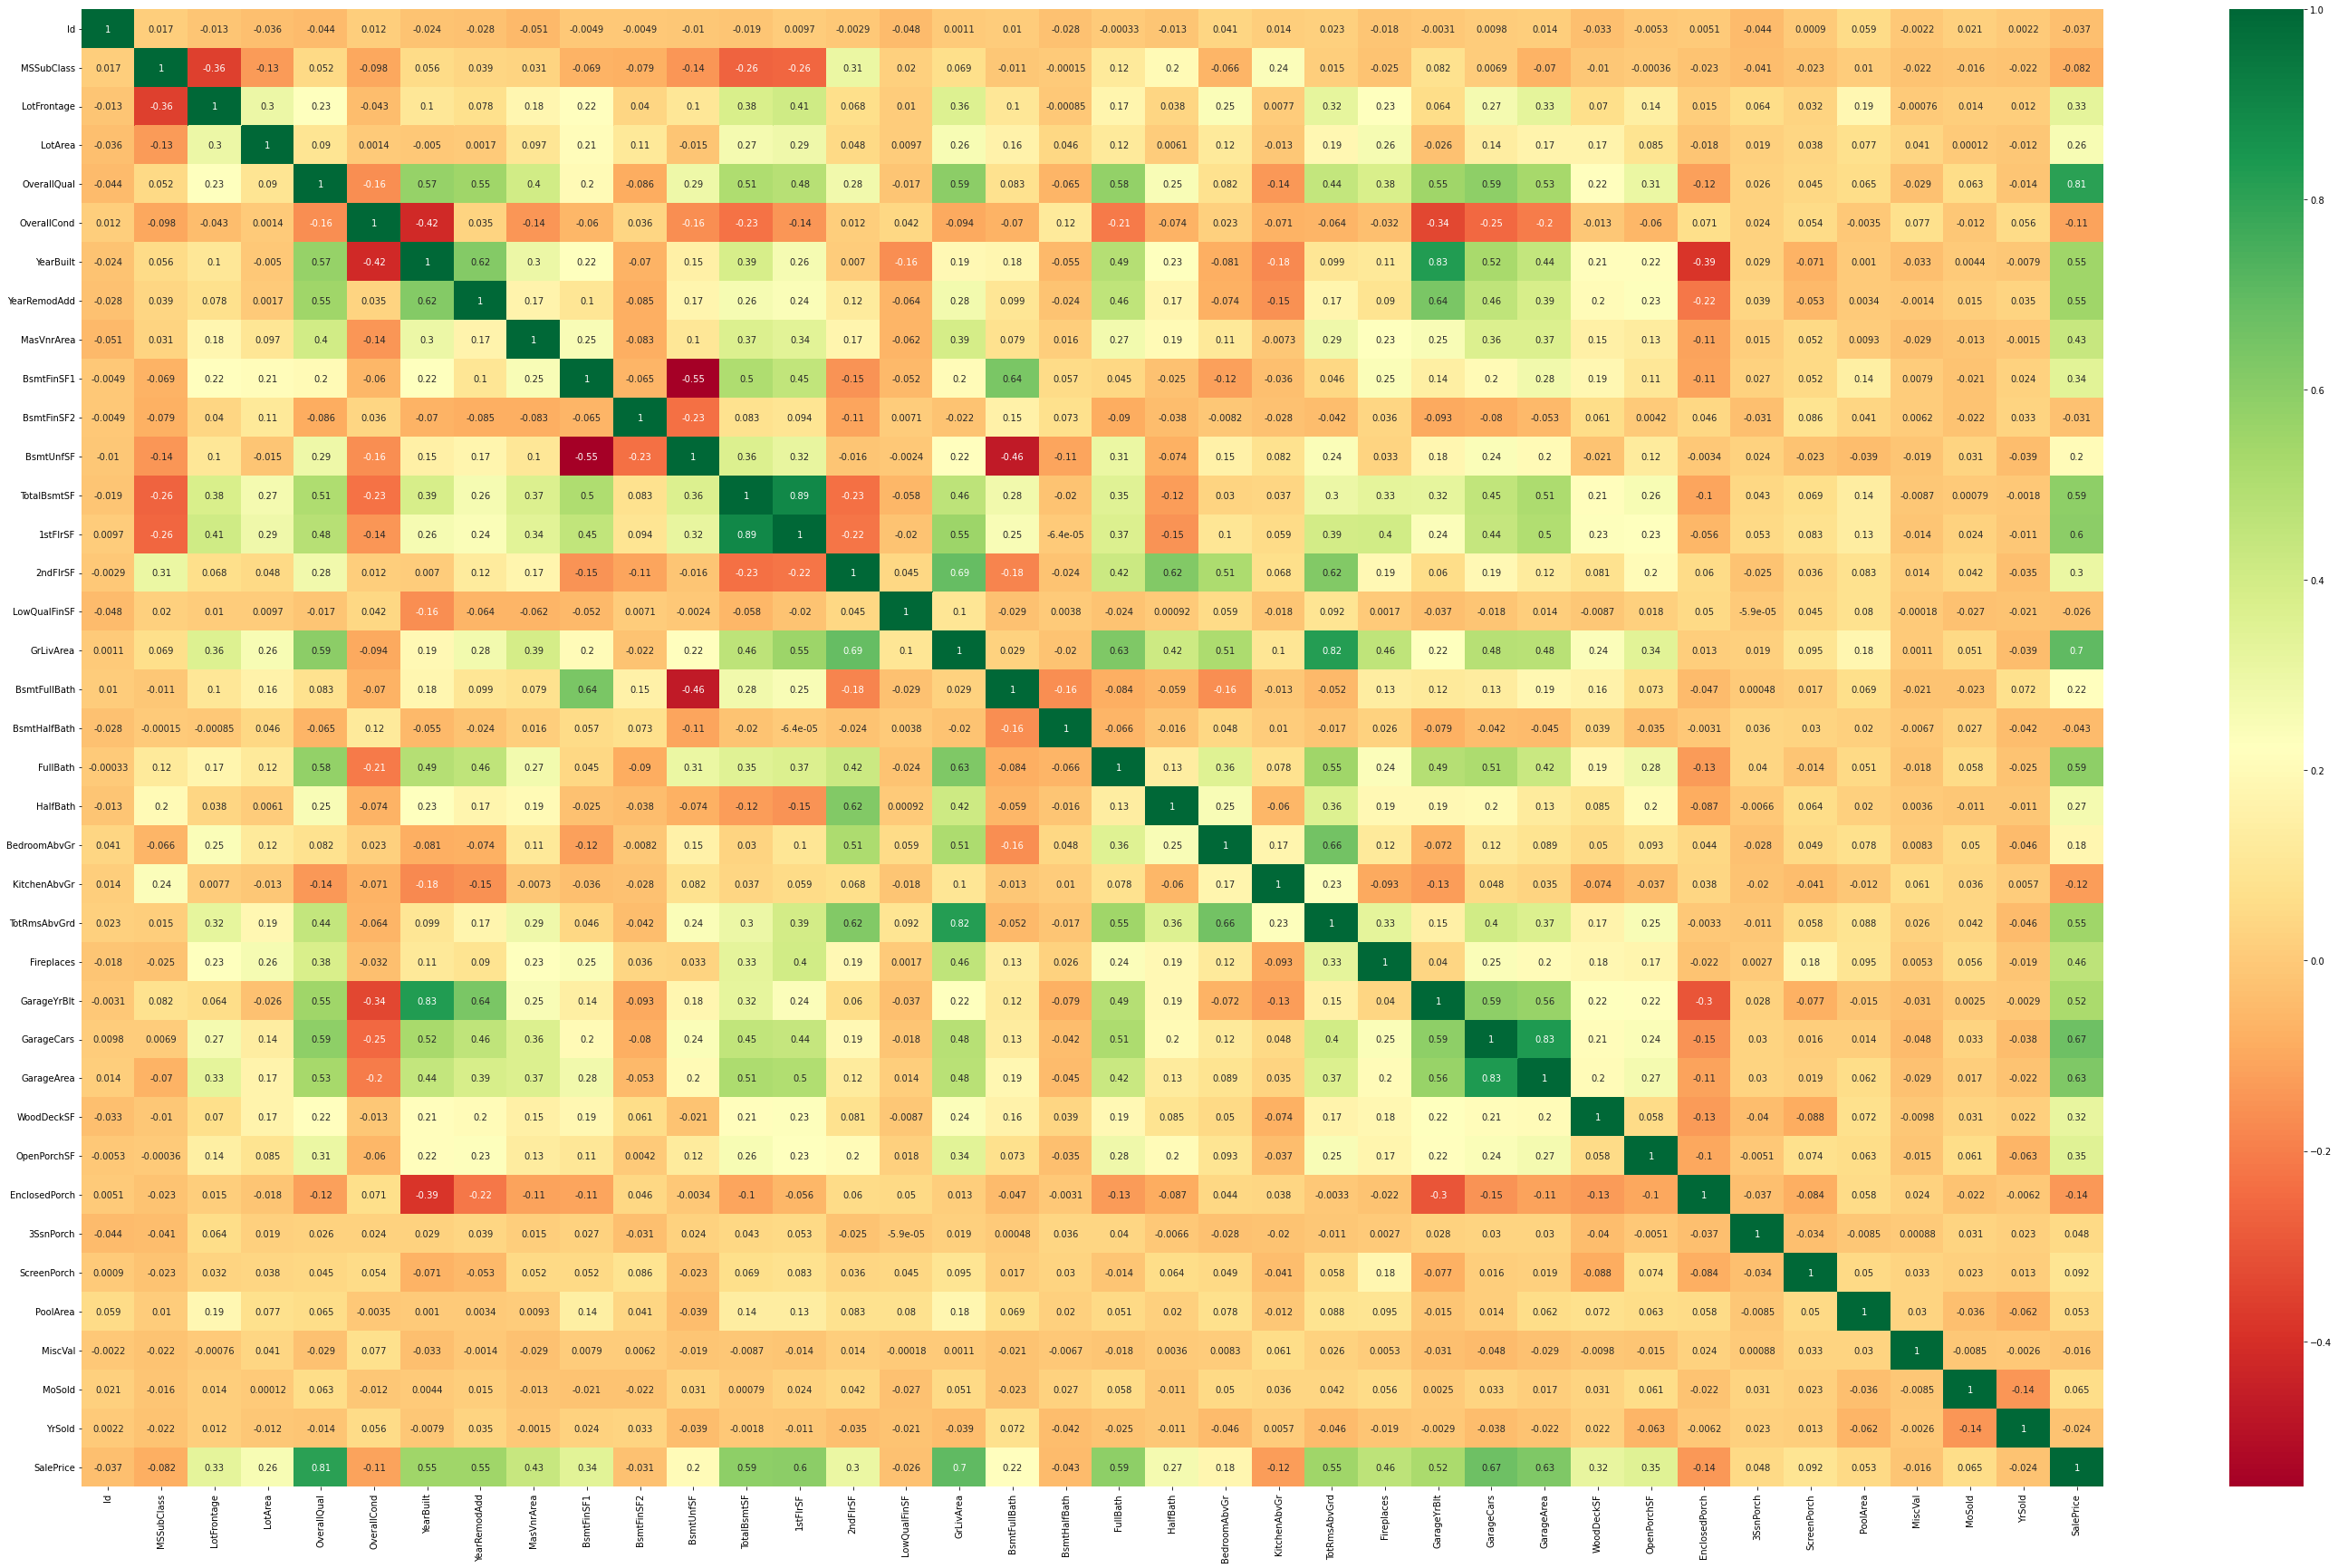

In [48]:
import seaborn as sns
#Heatmap to visualize collinearity
plt.figure(figsize=(50,30))
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)
plt.show()

In [ ]:
#The identification features that need to be dropped are ones that are highly correlated or are above 0.8
#These include:
#Year Built and Garage Year Built:0.83
#Total BsmtSF and lstFlrSF: 0.89
#GrLivARea and TotRmsAbvGrd: 0.82
#GarageCars and GarageArea: 0.83


